**Multidimension Motif Discovery and Mutual Information of Time Series**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pickle


with open('/content/drive/MyDrive/seated_diners.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
!pip install matrixprofile

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import matrixprofile as mp

In [5]:
data.head(50)

,Type,Name,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,...,2021-06-16,2021-06-17,2021-06-18,2021-06-19,2021-06-20,2021-06-21,2021-06-22,2021-06-23,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,2021-07-12,2021-07-13,2021-07-14,2021-07-15,2021-07-16,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-24,2021-07-25
0,country,Global,-1.00,3.00,-1.00,-2.00,1.00,4.00,1.00,1.00,-2.00,-3.00,-1.00,1.00,0.00,-8.00,-9.00,-6.00,-7.00,-7.00,-4.00,-3.00,-14.00,-18.00,-19.00,-28.00,-36.00,-40.00,-47.00,-56.00,-83.00,-89.00,-96.03,-97.94,-98.96,-99.24,-99.68,-99.72,-99.75,-99.79,...,-6.52,-3.95,-0.62,5.17,41.00,-9.83,-13.05,-6.78,-5.50,0.48,6.56,4.19,-9.22,-51.32,-6.47,10.88,-1.66,3.13,-7.71,11.21,-14.31,-8.65,-7.07,-0.49,4.24,2.29,-11.63,-10.78,-5.05,-2.16,-0.09,2.82,3.70,-6.77,-6.77,-5.00,-3.33,-1.09,1.09,1.01
1,country,Australia,-3.00,-6.00,-3.00,-1.00,0.00,0.00,0.00,-2.00,-2.00,-7.00,0.00,-1.00,4.00,-12.00,-6.00,-12.00,-8.00,-6.00,-3.00,-4.00,-10.00,-4.00,-10.00,-12.00,-8.00,-11.00,-12.00,-30.00,-43.00,-50.00,-53.00,-51.67,-53.61,-65.53,-99.82,-100.00,-100.00,-100.00,...,87.12,99.89,114.11,133.01,150.37,100.68,92.53,99.64,105.91,137.42,111.08,92.98,65.49,26.97,38.40,28.42,43.83,67.51,71.58,46.42,77.20,73.72,75.64,94.09,82.01,81.55,39.40,37.51,37.75,74.41,-13.82,-7.35,-11.27,-17.03,-32.33,-30.71,-32.75,-25.46,-18.15,-24.05
2,country,Canada,-5.00,0.00,-3.00,-2.00,-1.00,8.00,-2.00,-3.00,1.00,-12.00,-8.00,-4.00,-7.00,-12.00,-7.00,-2.00,-4.00,-8.00,-9.00,-1.00,-13.00,-18.00,-19.00,-28.00,-40.00,-41.00,-47.00,-60.00,-94.00,-97.00,-99.47,-99.72,-99.89,-99.94,-99.97,-99.99,-99.97,-99.98,...,-39.11,-37.11,-37.01,-24.31,-0.40,-39.33,-39.42,-33.90,-35.08,-32.98,-23.16,-30.17,-35.06,-66.16,-9.63,-5.78,-29.70,-17.45,-17.17,-24.79,-25.68,-31.22,-38.06,-18.99,-10.87,-20.82,-25.93,-30.69,-18.78,-25.87,-10.40,-3.27,-4.18,-9.50,-12.42,-8.81,-8.95,-1.86,-3.64,-2.94
3,country,Germany,11.00,4.00,3.00,5.00,1.00,2.00,11.00,4.00,5.00,5.00,11.00,7.00,9.00,-8.00,0.00,-4.00,-6.00,-7.00,4.00,11.00,-10.00,-16.00,-11.00,-17.00,-28.00,-38.00,-46.00,-63.00,-90.00,-95.00,-98.36,-98.79,-99.78,-99.96,-100.00,-100.00,-100.00,-100.00,...,5.62,-4.50,22.35,15.04,39.18,5.25,-0.31,10.91,4.19,25.70,45.00,56.03,5.56,-9.27,9.34,16.30,36.37,48.59,33.20,4.59,12.71,20.79,17.58,29.51,45.90,36.75,18.32,21.44,29.46,35.39,57.95,60.22,59.52,36.07,47.12,60.43,63.09,69.96,54.90,44.51
4,country,Ireland,2.00,0.00,4.00,1.00,-3.00,4.00,-9.00,-8.00,-10.00,-2.00,-10.00,-13.00,10.00,-6.00,-7.00,-1.00,-15.00,-13.00,-5.00,4.00,-10.00,-28.00,-27.00,-46.00,-51.00,-52.00,-75.00,-70.00,-86.00,-97.00,-98.55,-99.08,-98.76,-98.31,-100.00,-99.55,-100.00,-100.00,...,36.16,26.72,49.77,43.83,88.65,73.12,31.42,27.91,19.57,31.86,44.11,80.28,76.11,58.35,81.67,54.06,44.04,24.91,47.37,80.93,36.43,67.49,64.20,61.41,56.11,72.85,86.29,73.97,78.93,80.49,58.14,41.76,78.27,63.83,52.67,66.53,59.38,51.59,41.80,73.68
5,country,Mexico,-5.00,-5.00,-4.00,-3.00,-1.00,2.00,-1.00,-3.00,-9.00,-7.00,-10.00,-5.00,-7.00,-7.00,-10.00,-6.00,-6.00,-8.00,-2.00,-5.00,-19.00,-16.00,-15.00,-16.00,-16.00,-21.00,-35.00,-48.00,-62.00,-73.00,-78.41,-85.12,-90.81,-95.20,-94.60,-95.81,-96.60,-97.33,...,13.44,12.47,20.91,35.57,75.31,29.15,11.21,12.81,13.18,16.43,27.47,23.13,25.00,-54.28,17.02,8.64,15.92,29.05,42.17,32.57,19.28,16.24,11.97,20.12,25.18,23.81,22.70,8.29,13.90,13.26,21.64,27.28,24.64,23.32,15.84,15.16,12.53,16.15,19.56,18.74
6,country,United Kingdom,1.00,-1.00,-2.00,0.00,-1.00,-4.00,-6.0

In [6]:
df=data.T
df=df.drop('Type')
df=df.rename(columns=df.iloc[0])
df.drop('Name')

,Global,Australia,Canada,Germany,Ireland,Mexico,United Kingdom,United States,Alabama,Alberta,Arizona,Baden-Württemberg,Baja California Sur,Bavaria,British Columbia,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Hesse,Illinois,Indiana,Jalisco,Kansas,Kentucky,Louisiana,Lower Saxony,Maine,Manitoba,Maryland,Massachusetts,Mexico City,Michigan,Minnesota,Missouri,Nebraska,...,Fort Lauderdale,Frankfurt am Main,Hamburg,Honolulu,Houston,Indianapolis,Kansas City,Las Vegas,London,Los Angeles,Louisville,Manchester (UK),Miami,Miami Beach,Milwaukee,Minneapolis,Montréal,München,Naples (US),Nashville,New Orleans,New York,Orlando,Philadelphia,Phoenix,Pittsburgh,Portland,Raleigh,San Antonio,San Diego,San Francisco,San Pedro Garza García,Scottsdale,Seattle,St. Louis,Tampa,Toronto,Tucson,Vancouver,Washington
2020-02-18,-1,-3,-5,11,2,-5,1,0,-14,2,0,-99.38,-6,-98.19,8,-2,1,8,-58.31,-5,0,0,0,-98.68,-4,21,8,39,11,-6,-98.9,-59.39,-97.89,6,0,-8,-12,-11,32,30,...,-8,-99.27,13,-3,-2,52,-36.99,-22,4,7,28,-100,0,19,-62.1,-14,16,8,-2,13,-9,1,-6,10,-4,10,1,7,-6,-1,-15,-9,-3,8,-51.86,7,-14,-63.85,9,-5
2020-02-19,3,-6,0,4,0,-5,-1,4,7,10,1,-96.53,-2,-97.85,-3,2,-8,26,-27.99,55,-3,4,2,-96.91,4,13,9,2,14,2,-95.81,-26.22,-94.76,70,7,-9,0,51,17,8,...,-4,-99.45,12,1,-8,14,-53.29,-19,1,6,11,-100,-8,-2,-82.43,27,14,14,-5,7,1,11,-3,55,0,24,-4,10,-4,9,-11,-12,-3,11,-69.25,5,-8,-40.67,1,57
2020-02-20,-1,-3,-3,3,4,-4,-2,0,1,2,8,-96.59,-2,-97.62,1,5,-4,1,-33.16,8,-4,-6,4,-98.57,-2,-15,0,-14,2,9,-95.02,-16.81,-96.36,4,5,-1,-9,-15,-1,6,...,-6,-99.33,4,3,-3,-28,-41.73,-6,2,9,7,-99.39,-5,6,-81.5,-33,-5,4,-3,-10,14,3,-12,11,11,-14,7,-49,-5,7,-4,-5,5,6,-62.56,2,-9,-22.83,7,9
2020-02-21,-2,-1,-2,5,1,-3,0,-1,-2,1,4,-99.22,-9,-96.5,6,0,7,-3,-50.38,0,-5,-5,5,-97.31,-3,-8,5,-11,6,10,-92.36,-41.67,-100,1,-7,-2,-12,-9,3,-1,...,-14,-96.22,12,9,3,-15,-51.49,0,3,1,0,-99.95,1,7,-81.98,-15,-1,10,7,7,23,0,-7,1,-1,-9,11,-9,2,-1,-8,4,6,1,-70,-4,-9,-40,6,0
2020-02-22,1,0,-1,1,-3,-1,-1,2,8,5,-3,-97.2,1,-97.58,3,-2,1,-6,-40.94,8,2,-2,4,-97.64,6,3,-6,-4,11,2,-94.46,-50.92,-99.31,8,-1,0,0,17,1,163,...,-8,-98.75,6,9,1,4,-46.21,-4,-1,8,6,-100,5,10,-73.89,12,14,-1,3,10,10,3,2,2,0,-4,6,4,-6,-12,-9,10,-5,1,-64.04,11,-4,-40.22,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-21,-5,-30.71,-8.81,60.43,66.53,15.16,12.93,-8.35,-7.09,7.44,11.4,NaN,100.27,NaN,-18.53,-12.99,-3.66,27.45,NaN,-41.47,22.11,-3.96,-6.55,NaN,-28.04,6.1,31.17,-14.61,5.82,0.5,NaN,NaN,NaN,-22.82,-13.62,-20.95,5.7,-13.66,-17.16,11.25,...,29.06,NaN,8.49,-23.3,-12.28,-16.42,NaN,53.08,-36.16,-33.66,-4.81,NaN,28.77,15.6,NaN,-60.62,-46.07,41.89,20.34,2.89,-20.26,-55.31,15.01,-43.2,-2.86,-20.78,-44.17,-7.65,11.08,-4.6,-59.41,-0.93,13.84,-50.48,NaN,13.84,-38.55,NaN,-45.31,-41.95
2021-07-22,-3.33,-32.75,-8.95,63.09,59.38,12.53,17.22,-6.19,-3.48,2.73,12.63,NaN,81.14,NaN,-14.33,-13.36,-3.51,35.63,NaN,-39.54,20.99,-0.98,-8.01,NaN,-25.54,6.86,19.59,-12.89,4.84,0.01,NaN,NaN,NaN,-13.94,-8.4,-16.47,0.9,-13.16,-18.54,25.28,...,48.88,NaN,8.52,-26.77,-7.29,-13.9,NaN,41.85,-30.22,-34.63,-3.95,NaN,42.86,33.35,NaN,-52.55,-41.53,40.76,25.7,12.3,-13.29,-51.39,7.97,-31.89,-2.23,-16.82,-42.14,-15.35,20.27,-11.51,-57.05,-0.88,16.69,-51.31,NaN,23.97,-38.32,NaN,-40.87,-40.09
2021-07-23,-1.09,-25.46,-1.86,69.96,51.59,16.15,28.57,-4.98,-15.1,14.2,2.72,NaN,62.9,NaN,-13.72,-9.75,-6.03,32.25,NaN,-28.18,12.13,0.91,-10.17,NaN,-19.94,12.74,22.51,-10.25,5.15,-0.13,NaN,NaN,NaN,-17.45,-6.58,-11.97,-3.99,-13.16,-17.8,19.62,...,31.94,NaN,20.39,-21.15,4.86,-3.92,NaN,35.96,-22.3,-36.21,-0.34,NaN,17.97,7.67,NaN,-49.23,-38.76,56.21,21.18,1.74,-12.18,-46.74,5.23,-28.6,-12.23,-2.82,-46.12,-22.77,18.67,-1.91,-50.44,-1.54,9.1,-48.63,NaN,17.85,-26.92,NaN,-38.19,-29.

In [7]:
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)


In [8]:

df = df.drop(labels=0, axis=0)

In [9]:

df.reset_index(drop=True, inplace=True)

In [10]:

df1=pd.DataFrame()

In [11]:

df1["Date"]=df["Date"]
df1["Austin"]=df["Austin"]
df1

,Date,Austin
0,2020-02-18,0
1,2020-02-19,-6
2,2020-02-20,2
3,2020-02-21,3
4,2020-02-22,2
...,...,...
519,2021-07-21,4.21
520,2021-07-22,7.11
521,2021-07-23,8.6
522,2021-07-24,15.59


In [12]:
dtaa= pd.DataFrame()
dtaa=df1 = df1.iloc[:398]
df1

,Date,Austin
0,2020-02-18,0
1,2020-02-19,-6
2,2020-02-20,2
3,2020-02-21,3
4,2020-02-22,2
...,...,...
393,2021-03-17,16.49
394,2021-03-18,11.76
395,2021-03-19,9.6
396,2021-03-20,12.67


In [13]:
df1['Date'] = df1['Date'].astype('datetime64[ns]')
df1['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0     2020-02-18
1     2020-02-19
2     2020-02-20
3     2020-02-21
4     2020-02-22
         ...    
393   2021-03-17
394   2021-03-18
395   2021-03-19
396   2021-03-20
397   2021-03-21
Name: Date, Length: 398, dtype: datetime64[ns]

In [14]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.set_index('Date').sort_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



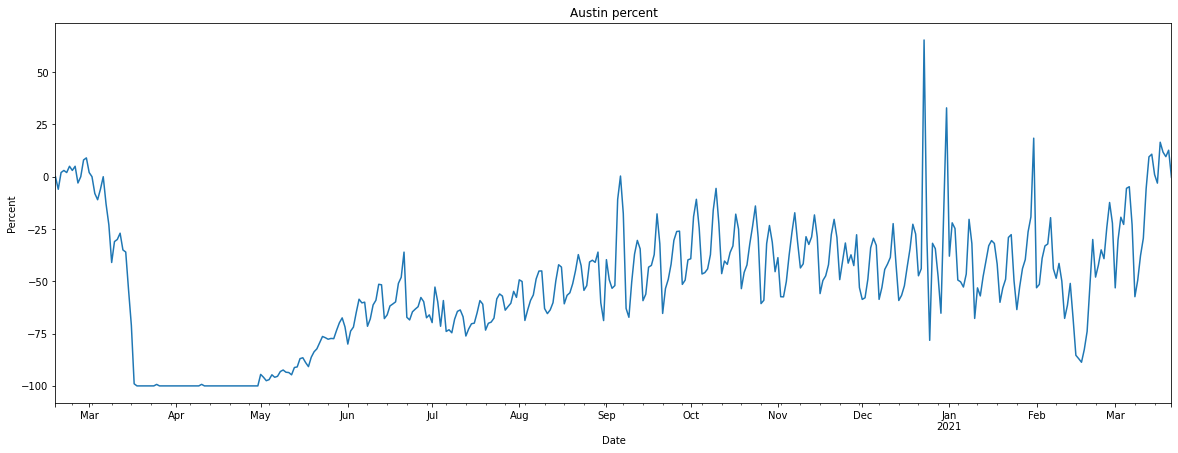

In [15]:
df1.plot(figsize=(20,7), legend=None, title='Austin percent')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()

In [16]:
windows = [
    ('4 Days', 4),
    ('7 Days', 8),
    ('12 Days', 12),
]

profiles = {}

for label, window_size in windows:
    profile = mp.compute(df1['Austin'].values, window_size)
    key = '{} Profile'.format(label)
    profiles[key] = profile

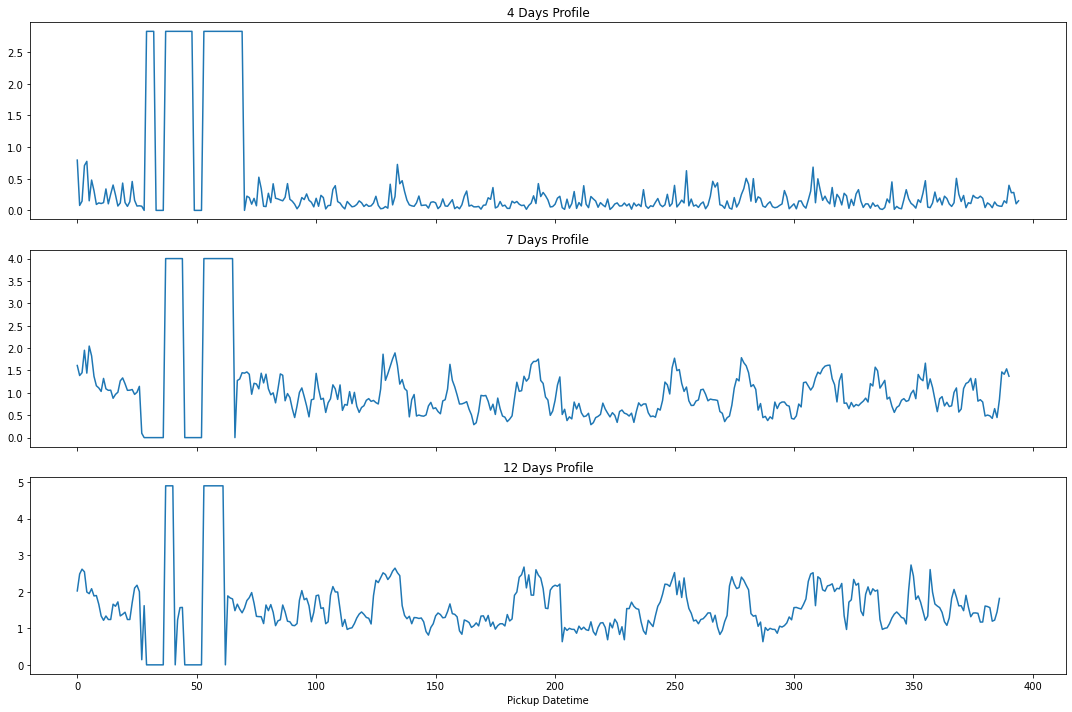

In [17]:
fig, axes = plt.subplots(3,1,sharex=True,figsize=(15,10))

for ax_idx, window in enumerate(windows):
    key = '{} Profile'.format(window[0])
    profile = profiles[key]
    axes[ax_idx].plot(profile['mp'])
    axes[ax_idx].set_title(key)

plt.xlabel('Pickup Datetime')
plt.tight_layout()
plt.show()

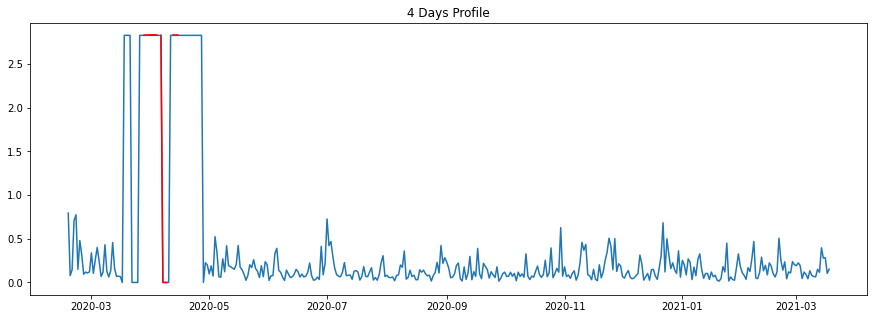

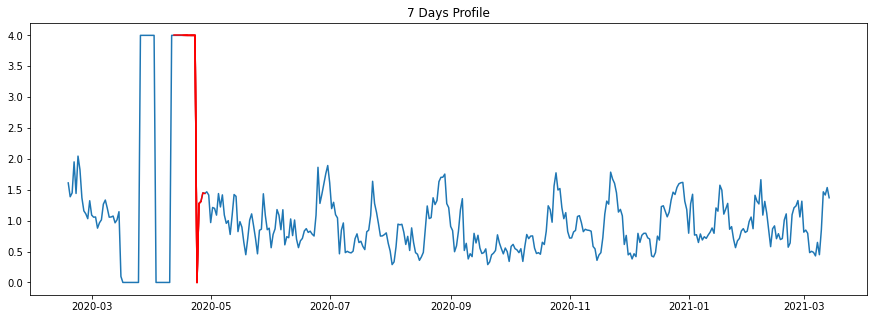

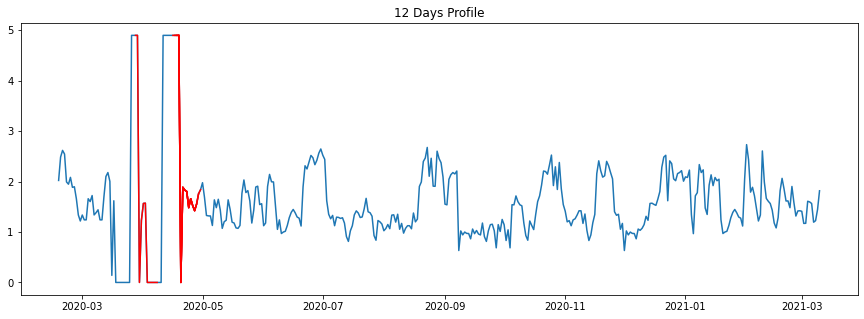

In [18]:

for label, window_size in windows:
    key = '{} Profile'.format(label)
    profiles[key] = mp.discover.discords(profiles[key], k=5)
    
    window_size = profiles[key]['w']
    mp_adjusted = np.append(profiles[key]['mp'], np.zeros(window_size - 1) + np.nan)
    
    plt.figure(figsize=(15, 5))
    ax = plt.plot(df1.index.values, mp_adjusted)
    plt.title(key)
    
    for start_index in profiles[key]['discords']:
        x = df1.index.values[start_index:start_index+window_size]
        y = mp_adjusted[start_index:start_index+window_size]
        plt.plot(x, y, c='r')
    
    plt.show()

In [19]:
key = '7 Days Profile'
profile = profiles[key]
window_size = profile['w']
mp_adjusted = np.append(profile['mp'], np.zeros(window_size - 1) + np.nan)
df1[key] = mp_adjusted

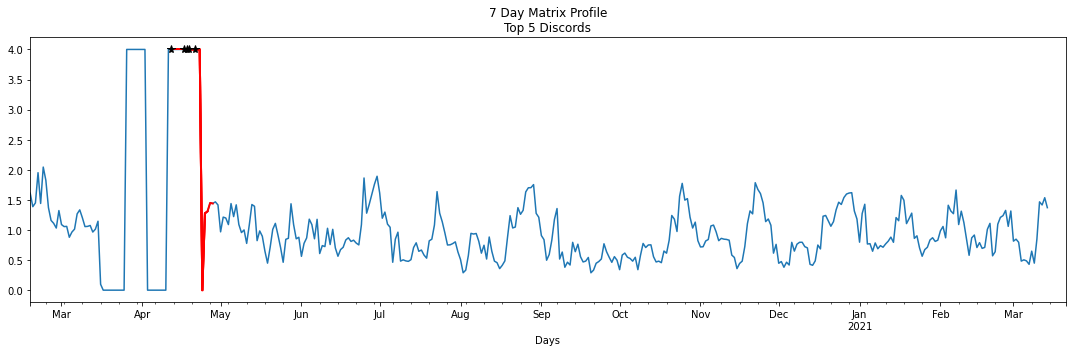

In [20]:
ax = df1[key].plot(title='7 Day Matrix Profile\nTop 5 Discords', figsize=(15,5))

for discord in profile['discords']:
    df1.iloc[discord:discord+window_size][key].plot(ax=ax, c='r', lw='2')

df1.iloc[profile['discords']][key].plot(kind='line', marker='*', c='black', markersize=8, ax=ax, lw=0)
plt.xlabel('Days')
plt.tight_layout()
plt.show()

In [21]:
data2=pd.read_excel('/content/drive/MyDrive/Released Records_21FO003112 (1) (1).xlsx')  
data2

,Date,Austin Bergstrom International (AUS)
0,2021-03-22,13233
1,2021-03-21,16360
2,2021-03-20,10634
3,2021-03-19,12608
4,2021-03-18,13436
...,...,...
807,2019-01-05,16446
808,2019-01-04,19516
809,2019-01-03,21204
810,2019-01-02,22821


In [22]:
data1=df =pd.read_csv('/content/drive/MyDrive/daily_average_road_intersection_traffic_volume[1].csv')  
data1

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,NaN,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
62,2021,11,23230.714286,23183.285714,24098.857143,24803.857143,25985.000000,23129.571429,19230.857143
63,2021,12,25899.333333,21727.500000,24844.142857,30712.750000,32193.125000,23505.857143,23018.375000
64,2021,13,24616.857143,29582.875000,30693.125000,26878.571429,31486.125000,21356.428571,16289.857143
65,2021,14,24499.857143,24615.000000,24683.571429,24832.714286,26124.571429,23013.428571,19079.142857


In [23]:
data1

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,NaN,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
62,2021,11,23230.714286,23183.285714,24098.857143,24803.857143,25985.000000,23129.571429,19230.857143
63,2021,12,25899.333333,21727.500000,24844.142857,30712.750000,32193.125000,23505.857143,23018.375000
64,2021,13,24616.857143,29582.875000,30693.125000,26878.571429,31486.125000,21356.428571,16289.857143
65,2021,14,24499.857143,24615.000000,24683.571429,24832.714286,26124.571429,23013.428571,19079.142857


In [24]:

data2['Day'] = data2['Date'].dt.day_name()
  
data2

,Date,Austin Bergstrom International (AUS),Day
0,2021-03-22,13233,Monday
1,2021-03-21,16360,Sunday
2,2021-03-20,10634,Saturday
3,2021-03-19,12608,Friday
4,2021-03-18,13436,Thursday
...,...,...,...
807,2019-01-05,16446,Saturday
808,2019-01-04,19516,Friday
809,2019-01-03,21204,Thursday
810,2019-01-02,22821,Wednesday


In [25]:
data2.head(50)

,Date,Austin Bergstrom International (AUS),Day
0,2021-03-22,13233,Monday
1,2021-03-21,16360,Sunday
2,2021-03-20,10634,Saturday
3,2021-03-19,12608,Friday
4,2021-03-18,13436,Thursday
5,2021-03-17,12136,Wednesday
6,2021-03-16,13270,Tuesday
7,2021-03-15,17140,Monday
8,2021-03-14,16181,Sunday
9,2021-03-13,15083,Saturday


In [26]:
data2=data2.sort_values(by=['Date'],ignore_index=True)

In [27]:
data2['week_number'] = data2['Date'].dt.week
data2.head(812)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Date,Austin Bergstrom International (AUS),Day,week_number
0,2019-01-01,20946,Tuesday,1
1,2019-01-02,22821,Wednesday,1
2,2019-01-03,21204,Thursday,1
3,2019-01-04,19516,Friday,1
4,2019-01-05,16446,Saturday,1
...,...,...,...,...
807,2021-03-18,13436,Thursday,11
808,2021-03-19,12608,Friday,11
809,2021-03-20,10634,Saturday,11
810,2021-03-21,16360,Sunday,11


In [28]:
dfinal2 = data2.iloc[413:811]
dfinal2

,Date,Austin Bergstrom International (AUS),Day,week_number
413,2020-02-18,23570,Tuesday,8
414,2020-02-19,21835,Wednesday,8
415,2020-02-20,25453,Thursday,8
416,2020-02-21,24777,Friday,8
417,2020-02-22,17415,Saturday,8
...,...,...,...,...
806,2021-03-17,12136,Wednesday,11
807,2021-03-18,13436,Thursday,11
808,2021-03-19,12608,Friday,11
809,2021-03-20,10634,Saturday,11


In [29]:
dfinal1= data1.iloc[0:63]
dfinal1

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,NaN,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
58,2021,7,4480.250000,7288.000000,4888.250000,5472.400000,16518.000000,19747.428571,18807.142857
59,2021,8,24419.285714,24335.714286,25333.142857,24376.428571,25410.857143,22065.428571,18071.285714
60,2021,9,22816.000000,24032.000000,24809.000000,25338.571429,26544.285714,23229.857143,19168.142857
61,2021,10,24389.000000,24111.285714,24642.571429,25086.571429,27107.142857,23904.000000,17471.714286


In [30]:

dfinal1['monday'].fillna(value=24165.405893, inplace=True)
dfinal1['tuesday'].fillna(value=24961.200737, inplace=True)
dfinal1['wednesday'].fillna(value=25315.679089, inplace=True)
dfinal1['thursday'].fillna(value=25260.732173, inplace=True)
dfinal1['friday'].fillna(value=26322.776365, inplace=True)
dfinal1['saturday'].fillna(value=22405.154244, inplace=True)
dfinal1['sunday'].fillna(value=18729.522118, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
dfi1=pd.DataFrame(dfinal1)
dfinal1

,year,week_of_year,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,2020,2,24165.405893,33166.416667,33764.416667,33971.166667,32076.666667,28167.583333,22937.916667
1,2020,3,30811.750000,32568.333333,33294.250000,33111.250000,33615.916667,27358.250000,24283.166667
2,2020,4,31248.416667,34918.000000,31111.000000,34153.000000,35641.916667,28303.833333,24479.083333
3,2020,5,33044.416667,33591.333333,34893.666667,35061.083333,36128.083333,29905.750000,24435.666667
4,2020,6,33657.333333,34274.083333,33996.583333,34925.500000,36684.166667,29777.000000,22236.750000
...,...,...,...,...,...,...,...,...,...
58,2021,7,4480.250000,7288.000000,4888.250000,5472.400000,16518.000000,19747.428571,18807.142857
59,2021,8,24419.285714,24335.714286,25333.142857,24376.428571,25410.857143,22065.428571,18071.285714
60,2021,9,22816.000000,24032.000000,24809.000000,25338.571429,26544.285714,23229.857143,19168.142857
61,2021,10,24389.000000,24111.285714,24642.571429,25086.571429,27107.142857,23904.000000,17471.714286


In [32]:
day=[]
tra=[]
ind=[]

In [33]:
for i in range(63):
  g=i+2
  for j in range(7):
    j=j+2
    day.append(dfinal1.columns[j])
    tra.append(dfinal1.iloc[i,j])
    
    ind.append(g)
len(ind)

441

In [34]:
lis=[ind,day,tra]

In [35]:
dfz1=pd.DataFrame(list(zip(ind,day,tra)), columns =['Week Number', 'Day','Traffic'])
dfz1.head(50)

,Week Number,Day,Traffic
0,2,monday,24165.405893
1,2,tuesday,33166.416667
2,2,wednesday,33764.416667
3,2,thursday,33971.166667
4,2,friday,32076.666667
5,2,saturday,28167.583333
6,2,sunday,22937.916667
7,3,monday,30811.750000
8,3,tuesday,32568.333333
9,3,wednesday,33294.250000


In [36]:
dfz1= dfz1.iloc[43:441]
dfz1

,Week Number,Day,Traffic
43,8,tuesday,34235.750000
44,8,wednesday,34390.583333
45,8,thursday,36630.000000
46,8,friday,39295.454545
47,8,saturday,30123.166667
...,...,...,...
436,64,wednesday,24098.857143
437,64,thursday,24803.857143
438,64,friday,25985.000000
439,64,saturday,23129.571429


In [37]:
del dfinal2['Date']
del dfinal2['Day']
del dfinal2['week_number']

In [38]:
dfinal2

,Austin Bergstrom International (AUS)
413,23570
414,21835
415,25453
416,24777
417,17415
...,...
806,12136
807,13436
808,12608
809,10634


In [39]:
passenger=[]
percent=[]
i=413
j=0
for value in dfinal2["Austin Bergstrom International (AUS) "]:
        passenger.append(dfinal2.at[i,'Austin Bergstrom International (AUS) '])
        percent.append(dtaa.at[j, 'Austin'])
        i=i+1
        j=j+1
dfz1["T2"] = passenger
dfz1["T3"]= percent

In [40]:
dfz1

,Week Number,Day,Traffic,T2,T3
43,8,tuesday,34235.750000,23570,0.00
44,8,wednesday,34390.583333,21835,-6.00
45,8,thursday,36630.000000,25453,2.00
46,8,friday,39295.454545,24777,3.00
47,8,saturday,30123.166667,17415,2.00
...,...,...,...,...,...
436,64,wednesday,24098.857143,12136,16.49
437,64,thursday,24803.857143,13436,11.76
438,64,friday,25985.000000,12608,9.60
439,64,saturday,23129.571429,10634,12.67


In [41]:
dfz1.rename(columns={'Traffic':'T1'})

,Week Number,Day,T1,T2,T3
43,8,tuesday,34235.750000,23570,0.00
44,8,wednesday,34390.583333,21835,-6.00
45,8,thursday,36630.000000,25453,2.00
46,8,friday,39295.454545,24777,3.00
47,8,saturday,30123.166667,17415,2.00
...,...,...,...,...,...
436,64,wednesday,24098.857143,12136,16.49
437,64,thursday,24803.857143,13436,11.76
438,64,friday,25985.000000,12608,9.60
439,64,saturday,23129.571429,10634,12.67


In [42]:

del dfz1['Week Number']
del dfz1['Day']

In [43]:

dfz1=dfz1.rename(columns={'Traffic':'T1'})

In [44]:

dfz1

,T1,T2,T3
43,34235.750000,23570,0.00
44,34390.583333,21835,-6.00
45,36630.000000,25453,2.00
46,39295.454545,24777,3.00
47,30123.166667,17415,2.00
...,...,...,...
436,24098.857143,12136,16.49
437,24803.857143,13436,11.76
438,25985.000000,12608,9.60
439,23129.571429,10634,12.67


**Multidimension motif discovery**

In [45]:
dfz1['T2']=dfz1['T2'].astype(float)

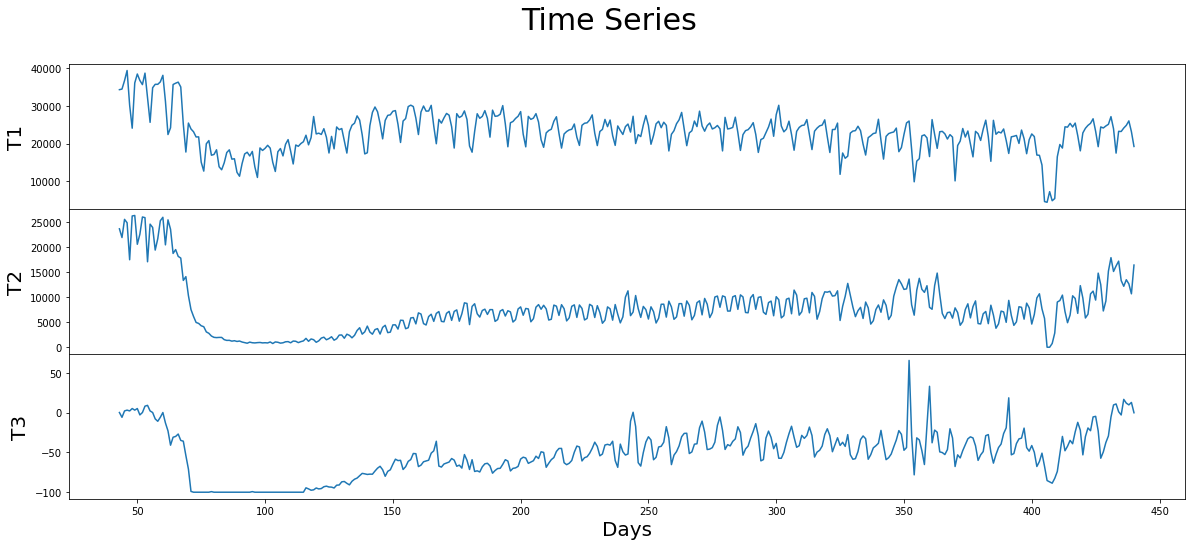

In [46]:
fig, axs = plt.subplots(dfz1.shape[1], sharex=True, gridspec_kw={'hspace': 0},figsize=(20,8))
plt.suptitle('Time Series', fontsize='30')

for i in range(dfz1.shape[1]):
    axs[i].set_ylabel(f'T{i + 1}', fontsize='20')
    axs[i].set_xlabel('Days', fontsize ='20')
    axs[i].plot(dfz1[f'T{i + 1}'])

plt.show()

In [47]:
from IPython.display import IFrame

In [48]:
# !pip install scipy>=1.5
# !pip install stumpy


In [49]:
import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt


In [50]:
m = 7
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in dfz1.columns:
    mps[dim_name] = stumpy.stump(dfz1[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].min(), 1)
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]

/usr/local/lib/python3.7/dist-packages/stumpy/stump.py:350: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



The motif pair matrix profile value in T1 is 0.1
The motif pair matrix profile value in T2 is 0.1
The motif pair matrix profile value in T3 is 0.0


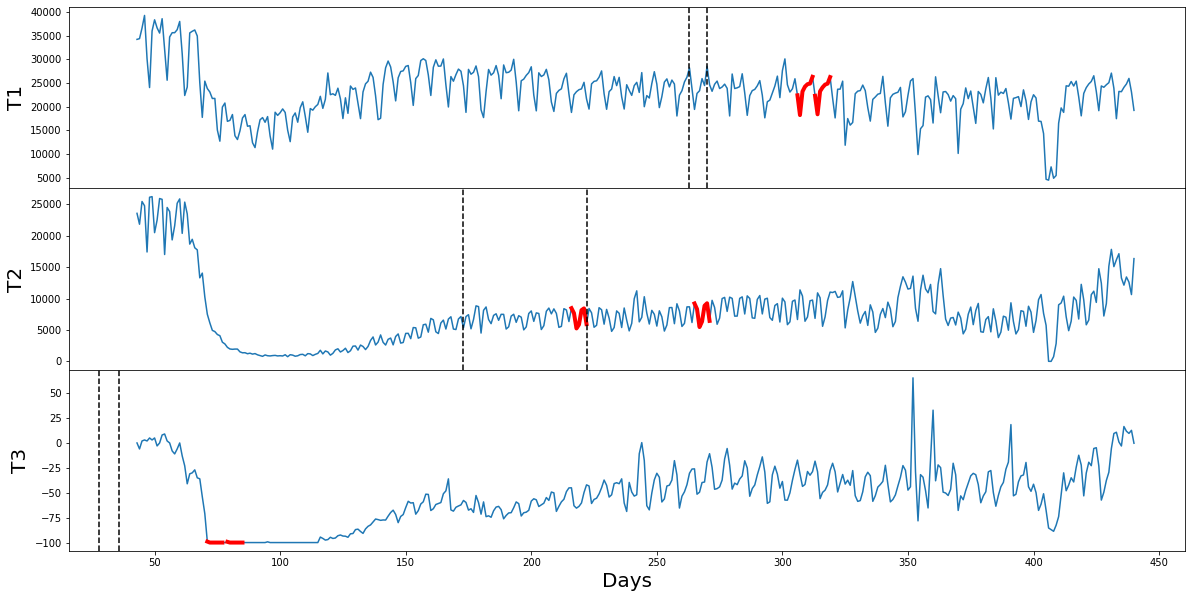

In [51]:

fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0},figsize=(20,10))

for i, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='20')
    axs[i].plot(dfz1[dim_name])
    axs[i].set_xlabel('Days', fontsize ='20')
    for idx in motifs_idx[dim_name]:
        axs[i].plot(dfz1[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')

plt.show()

In [52]:
mps, indices = stumpy.mstump(dfz1, m)

In [53]:
motifs_idx = np.argsort(mps, axis=1)[:, :2]


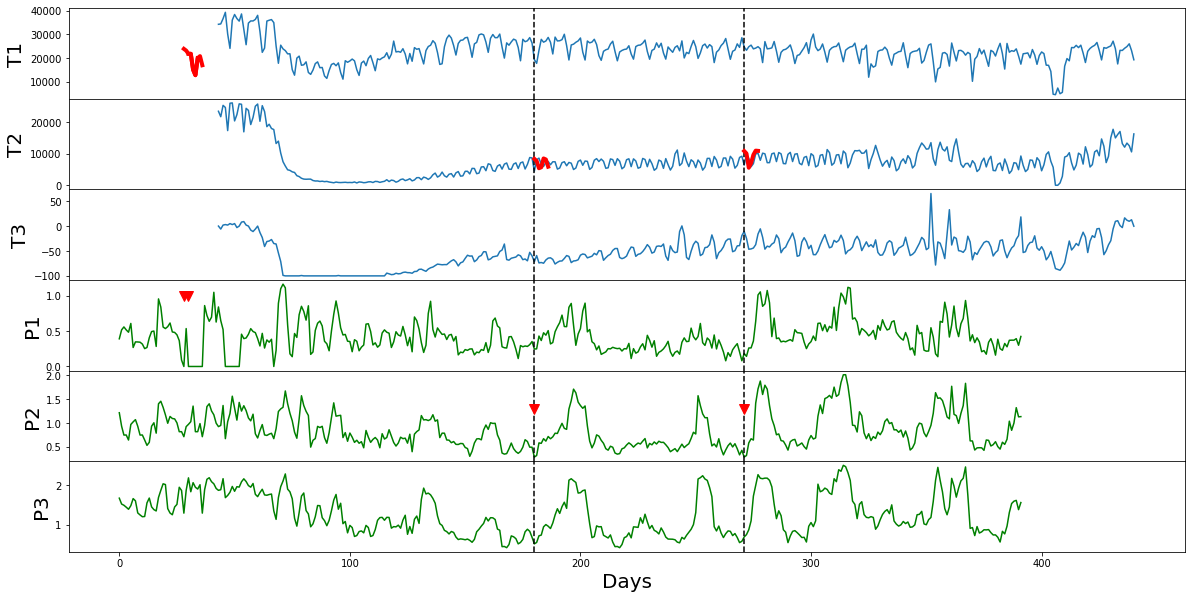

In [54]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0},figsize=(20,10))

for k, dim_name in enumerate(dfz1.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(dfz1[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='green')
    axs[k + mps.shape[0]].set_xlabel('Days', fontsize ='20')

    axs[k].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    if dim_name == 'T2'or dim_name=='T1': 
        axs[k].plot(range(motifs_idx[k, 0], motifs_idx[k, 0] + m), dfz1[dim_name].iloc[motifs_idx[k, 0] : motifs_idx[k, 0] + m], c='red', linewidth=4)
        axs[k].plot(range(motifs_idx[k, 1], motifs_idx[k, 1] + m), dfz1[dim_name].iloc[motifs_idx[k, 1] : motifs_idx[k, 1] + m], c='red', linewidth=4)
        axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='red')
        axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='red')
plt.show()

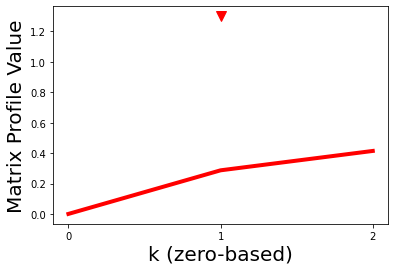

In [55]:

plt.plot(mps[range(mps.shape[0]), motifs_idx[:, 0]], c='red', linewidth='4')
plt.xlabel('k (zero-based)', fontsize='20')
plt.ylabel('Matrix Profile Value', fontsize='20')
plt.xticks(range(mps.shape[0]))
plt.plot(1, 1.3, marker="v", markersize=10, color='red')
plt.show()

In [56]:
from sklearn.feature_selection import mutual_info
mutual_info

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.mutual_info module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



<module 'sklearn.feature_selection.mutual_info' from '/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/mutual_info.py'>

**Mutual Information**

In [57]:

!pip install pyinform

     |████████████████████████████████| 131 kB 35.6 MB/s 


In [58]:
import numpy as np

from ctypes import byref, c_int, c_ulong, c_double, POINTER
from pyinform import _inform
from pyinform.error import ErrorCode, error_guard
def mutual_info(xs, ys, local=False):
    """
    Compute the (local) mutual information between two time 
    series.

    This function explicitly takes the logarithmic base *b* as an argument.

    :param xs: a time series
    :type xs: a sequence or ``numpy.ndarray``
    :param ys: a time series
    :type ys: a sequence or ``numpy.ndarray``
    :param bool local: compute the local mutual information
    :return: the local or average mutual information
    :rtype: float or ``numpy.ndarray``
    :raises ValueError: if the time series have different shapes
    :raises InformError: if an error occurs within the ``inform`` C call
    """
    us = np.ascontiguousarray(xs, dtype=np.int32)
    vs = np.ascontiguousarray(ys, dtype=np.int32)
    if us.shape != vs.shape:
        raise ValueError("timeseries lengths do not match")

    series = np.ascontiguousarray([us.flatten(), vs.flatten()], dtype=np.int32)

    bx = max(2, np.amax(us) + 1)
    by = max(2, np.amax(vs) + 1)

    bs = np.ascontiguousarray([bx, by], dtype=np.int32)

    seriesdata = series.ctypes.data_as(POINTER(c_int))
    bsdata = bs.ctypes.data_as(POINTER(c_int))
    l, n = series.shape

    e = ErrorCode(0)

    if local is True:
        mi = np.empty(us.shape, dtype=np.float64)
        out = mi.ctypes.data_as(POINTER(c_double))
        _local_mutual_info(seriesdata, c_ulong(l), c_ulong(n), bsdata, out, byref(e))
    else:
        mi = _mutual_info(seriesdata, c_ulong(l), c_ulong(n), bsdata, byref(e))

    error_guard(e)

    return mi



_mutual_info = _inform.inform_mutual_info
_mutual_info.argtypes = [POINTER(c_int), c_ulong, c_ulong, POINTER(c_int), POINTER(c_int)]
_mutual_info.restype = c_double

_local_mutual_info = _inform.inform_local_mutual_info
_local_mutual_info.argtypes = [POINTER(c_int), c_ulong, c_ulong, POINTER(c_int), POINTER(c_double), POINTER(c_int)]
_local_mutual_info.restype = c_double

In [63]:
dfz1

,T1,T2,T3
43,34235.750000,23570.0,0.00
44,34390.583333,21835.0,-6.00
45,36630.000000,25453.0,2.00
46,39295.454545,24777.0,3.00
47,30123.166667,17415.0,2.00
...,...,...,...
436,24098.857143,12136.0,16.49
437,24803.857143,13436.0,11.76
438,25985.000000,12608.0,9.60
439,23129.571429,10634.0,12.67


In [66]:
xs=dfz1["T1"].to_numpy()
ys=dfz1["T2"].to_numpy()

In [69]:

mutual_info(xs, ys)

8.586373364262263

In [70]:

mutual_info(xs, ys, local=True)

array([8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 6.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662462,
       8.63662462, 8.63662462, 8.63662462, 8.63662462, 8.63662

In [73]:
xs=dfz1["T1"].to_numpy()
ys=dfz1["T3"].to_numpy()+100

In [74]:

mutual_info(xs, ys)

6.070984990859147

In [75]:

mutual_info(xs, ys, local=True)

array([6.31469653, 6.31469653, 7.05166212, 7.63662462, 7.05166212,
       7.63662462, 7.63662462, 7.63662462, 8.63662462, 6.31469653,
       8.63662462, 7.05166212, 7.05166212, 6.31469653, 8.63662462,
       7.05166212, 6.31469653, 6.31469653, 7.63662462, 5.8292697 ,
       6.05166212, 6.05166212, 6.05166212, 6.31469653, 6.31469653,
       8.63662462, 5.63662462, 7.05166212, 7.63662462, 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 7.05166212, 7.05166

In [76]:
xs=dfz1["T2"].to_numpy()
ys=dfz1["T3"].to_numpy()+100

In [77]:
mutual_info(xs, ys)

6.08103524211543

In [78]:

mutual_info(xs, ys, local=True)

array([6.31469653, 6.31469653, 7.05166212, 7.63662462, 7.05166212,
       7.63662462, 7.63662462, 7.63662462, 8.63662462, 6.31469653,
       8.63662462, 7.05166212, 7.05166212, 6.31469653, 8.63662462,
       7.05166212, 6.31469653, 6.31469653, 7.63662462, 5.8292697 ,
       6.05166212, 6.05166212, 6.05166212, 6.31469653, 6.31469653,
       8.63662462, 5.63662462, 7.05166212, 7.63662462, 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 3.177193  , 3.177193  ,
       3.177193  , 3.177193  , 3.177193  , 7.05166212, 7.05166

**Submitted By:** 

**Sakshi Pandey** 

**Indian Institute Of Technology, Indore**